<a href="https://colab.research.google.com/github/byiringiroscar/NLP-Data-science-ML-and-Artificial-Intelligence/blob/main/stable_diffusion_xl_1_0_inpainting_0_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install diffusers
!pip install transformers
!pip install invisible_watermark transformers accelerate safetensors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.1 MB/s eta 0:00:00
  Created wheel for diffusers: filename=diffusers-0.21.2-py3-none-any.whl size=1489250 sha256=5e0de4853cdda5d592d288020d8543ce257264f26fe4184d2ade6ef6f0ff1e7d
  Stored in directory: /root/.cache/pip/wheels/2e/09/32/11c9e42c397d3f3494226b28ba68c4ad4718a68a65dba14ea6
Successfully built diffusers
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 116.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 11.6 MB/s eta 0:00:00


In [4]:
from diffusers import AutoPipelineForInpainting
from diffusers.utils import load_image
import torch

pipe = AutoPipelineForInpainting.from_pretrained("diffusers/stable-diffusion-xl-1.0-inpainting-0.1", torch_dtype=torch.float16, variant="fp16").to("cuda")

img_url = "/content/orig.png"
mask_url = "/content/masked.png"

image = load_image(img_url).resize((1024, 1024))
mask_image = load_image(mask_url).resize((1024, 1024))

prompt = "fat man"
generator = torch.Generator(device="cuda").manual_seed(0)

image = pipe(
  prompt=prompt,
  image=image,
  mask_image=mask_image,
  guidance_scale=8.0,
  num_inference_steps=20,  # steps between 15 and 30 work well for us
  strength=0.99,  # make sure to use `strength` below 1.0
  generator=generator,
).images[0]


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'decay': 0.9999, 'inv_gamma': 1.0, 'min_decay': 0.0, 'optimization_step': 37000, 'power': 0.6666666666666666, 'update_after_step': 0, 'use_ema_warmup': False} were passed to UNet2DConditionModel, but are not expected and will be ignored. Please verify your config.json configuration file.


  0%|          | 0/19 [00:00<?, ?it/s]

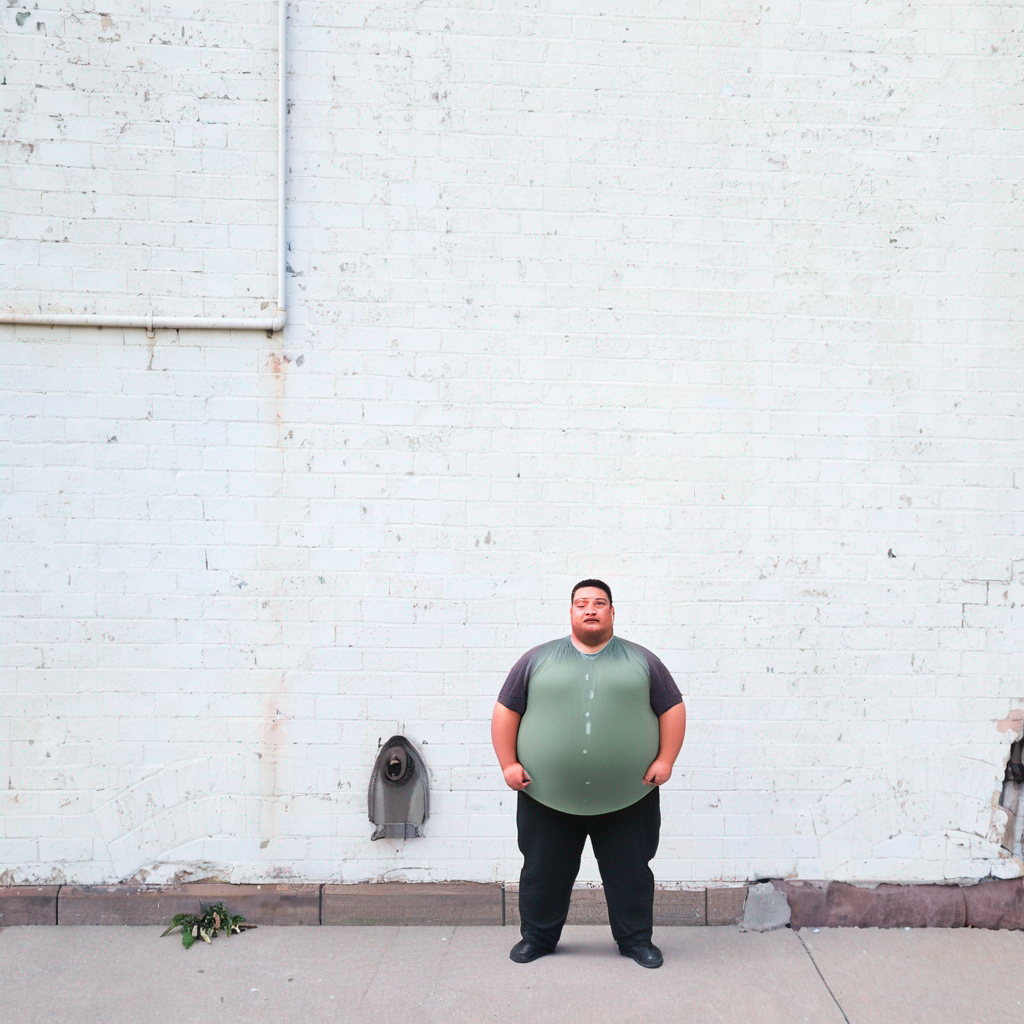

In [5]:
image